<a href="https://colab.research.google.com/github/AychaLARIBI/twitter-project-Aycha-laribi/blob/main/twitter_project_Aycha_LARIBI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation de Kaggle

In [ ]:
!pip install kaggle

Uploader kaggle.json

In [ ]:
from google.colab import files
files.upload()  # This will allow you to upload the kaggle.json file


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'  # Path where kaggle.json is stored

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'  # Path where kaggle.json is stored

# telecharger dataset from kaggle



In [11]:
!kaggle datasets download -d datatattle/covid-19-nlp-text-classification


Dataset URL: https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification
License(s): copyright-authors
100% 4.38M/4.38M [00:00<00:00, 44.8MB/s]
100% 4.38M/4.38M [00:00<00:00, 44.6MB/s]


# Extraire le dataset


In [12]:
!unzip covid-19-nlp-text-classification.zip


Archive:  covid-19-nlp-text-classification.zip
  inflating: Corona_NLP_test.csv     
  inflating: Corona_NLP_train.csv    


# Installer les bibliotheques necessaires

In [13]:
!pip install pandas


# **Charger et afficher le dataset**

In [14]:
import pandas as pd

# Charger le fichier CSV
dataset = pd.read_csv("Corona_NLP_train.csv", encoding="ISO-8859-1")

# Afficher les 5 premières lignes du dataset
print("Les 5 premières lignes du dataset :")
print(dataset.head())



Les 5 premières lignes du dataset :
   UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative  


In [15]:

# Afficher les noms des colonnes (attributs)
print("\nColonnes disponibles dans le dataset :")
print(dataset.columns)


Colonnes disponibles dans le dataset :
Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')


# Explorer les colonnes et résumer les données

In [16]:
# Afficher un résumé du dataset
print("\nRésumé du dataset :")
print(dataset.info())





Résumé du dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB
None


In [17]:


# Afficher la répartition des sentiments
print("\nRépartition des sentiments :")
print(dataset['Sentiment'].value_counts())


Répartition des sentiments :
Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64


# Nettoyage des données

Installez NLTK pour commencer le nettoyage des tweets :

In [18]:
!pip install nltk


In [20]:
import re
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Fonction de nettoyage des tweets
def clean_tweet(text):
    text = re.sub(r"http\S+|www\S+", "", text)  # Supprime les URLs
    text = re.sub(r"@\S+", "", text)           # Supprime les mentions
    text = re.sub(r"#", "", text)             # Supprime les hashtags
    text = re.sub(r"[^a-zA-Z\s]", "", text)   # Supprime les caractères spéciaux
    return text.lower()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Appliquer le nettoyage

In [21]:
dataset['cleaned_text'] = dataset['OriginalTweet'].apply(clean_tweet)

Afficher les 5 premiers tweets nettoyes

In [22]:
print("\nTweets nettoyés :")
print(dataset[['OriginalTweet', 'cleaned_text']].head())


Tweets nettoyés :
                                       OriginalTweet  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   
1  advice Talk to your neighbours family to excha...   
2  Coronavirus Australia: Woolworths to give elde...   
3  My food stock is not the only one which is emp...   
4  Me, ready to go at supermarket during the #COV...   

                                        cleaned_text  
0                                          and  and   
1  advice talk to your neighbours family to excha...  
2  coronavirus australia woolworths to give elder...  
3  my food stock is not the only one which is emp...  
4  me ready to go at supermarket during the covid...  


Supprimer les doublons et les lignes vides

supprimer toutes les lignes dupliquées dans la colonn

In [23]:
dataset = dataset.drop_duplicates(subset='cleaned_text')
dataset = dataset[dataset['cleaned_text'].str.strip() != ""]


In [24]:
# Afficher le nombre de lignes après nettoyage
print("\nNombre de lignes après suppression des doublons :", len(dataset))


Nombre de lignes après suppression des doublons : 41065


# Traitement des tweets NLP (Natural language processing )

Installez les ressources NLTK nécessaires pour la tokenisation, suppression des mots vides, et lemmatisation

In [25]:
import nltk
nltk.download('punkt_tab') # Download punkt_tab before calling word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize # import word_tokenize

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## Tokenisation, suppression des mots vides, et lemmatisation

In [26]:
# Tokenisation, suppression des mots vides, et lemmatisation
def process_tweet(tokens):
    tokens = [word for word in tokens if word not in stop_words]  # Supprimer les mots vides
    tokens = [lemmatizer.lemmatize(word) for word in tokens]      # Lemmatisation
    return tokens



In [27]:
# Appliquer le traitement
dataset['tokens'] = dataset['cleaned_text'].apply(word_tokenize)
dataset['processed_tokens'] = dataset['tokens'].apply(process_tweet)



In [28]:
 # Afficher un exemple
print("\nExemple de traitement NLP :")
print(dataset[['cleaned_text', 'processed_tokens']].head())


Exemple de traitement NLP :
                                        cleaned_text  \
0                                          and  and    
1  advice talk to your neighbours family to excha...   
2  coronavirus australia woolworths to give elder...   
3  my food stock is not the only one which is emp...   
4  me ready to go at supermarket during the covid...   

                                    processed_tokens  
0                                                 []  
1  [advice, talk, neighbour, family, exchange, ph...  
2  [coronavirus, australia, woolworth, give, elde...  
3  [food, stock, one, empty, please, dont, panic,...  
4  [ready, go, supermarket, covid, outbreak, im, ...  


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convertir les tweets en vecteurs TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limite à 5000 mots les plus fréquents
X_tfidf = vectorizer.fit_transform(dataset['cleaned_text']).toarray()

# Afficher la taille de la matrice TF-IDF
print("Taille de la matrice TF-IDF :", X_tfidf.shape)


Taille de la matrice TF-IDF : (41065, 5000)


#  Appliquer K-Means

In [30]:
#Importation de KMeans
from sklearn.cluster import KMeans

# Appliquer K-Means avec différentes valeurs de k
num_clusters = 5  # valeur initiale
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
dataset['kmeans_cluster'] = kmeans.fit_predict(X_tfidf)



In [31]:
# Afficher les résultats
print("Exemple de clusters avec K-Means :")
print(dataset[['cleaned_text', 'kmeans_cluster']].head())

Exemple de clusters avec K-Means :
                                        cleaned_text  kmeans_cluster
0                                          and  and                3
1  advice talk to your neighbours family to excha...               1
2  coronavirus australia woolworths to give elder...               1
3  my food stock is not the only one which is emp...               4
4  me ready to go at supermarket during the covid...               4


# Appliquer Fuzzy C-Means

In [32]:
!pip install -U scikit-fuzzy #Installing scikit-fuzzy
import skfuzzy as fuzz
import numpy as np



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.7 MB/s eta 0:00:00


In [33]:
# Appliquer Fuzzy C-Means
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(X_tfidf.T, c=num_clusters, m=2, error=0.005, maxiter=1000)

In [34]:
# Assignation des clusters :le cluster avec la plus haute appartenance
dataset['fuzzy_cluster'] = np.argmax(u, axis=0)


In [35]:
# Afficher les résultats
print("Exemple de clusters avec Fuzzy C-Means :")
print(dataset[['cleaned_text', 'fuzzy_cluster']].head())

Exemple de clusters avec Fuzzy C-Means :
                                        cleaned_text  fuzzy_cluster
0                                          and  and               3
1  advice talk to your neighbours family to excha...              1
2  coronavirus australia woolworths to give elder...              0
3  my food stock is not the only one which is emp...              4
4  me ready to go at supermarket during the covid...              1


# Identifier les tweets représentatifs

In [57]:
def find_representative_tweets(data, clusters, feature_matrix):
    representatives = []
    for cluster_id in np.unique(clusters):
        # Vérifier que les indices de cluster_data sont dans les limites de feature_matrix
        cluster_data = data[data['kmeans_cluster'] == cluster_id]

        # Obtenir les indices communs entre cluster_data et feature_matrix
        valid_indices = cluster_data.index.intersection(pd.Index(range(feature_matrix.shape[0])))

        # Filtrer cluster_data et cluster_vectors
        cluster_data = cluster_data.loc[valid_indices]
        cluster_vectors = feature_matrix[valid_indices]

        # Trouver le tweet le plus proche du centroïde
        centroid = cluster_vectors.mean(axis=0)
        distances = np.linalg.norm(cluster_vectors - centroid, axis=1)

        representative_idx = distances.argmin()  # Indice du tweet le plus proche du centroïde
        representatives.append(cluster_data.iloc[representative_idx]['cleaned_text'])
    return representatives


In [37]:
# Obtenir les représentants
kmeans_representatives = find_representative_tweets(dataset, dataset['kmeans_cluster'], X_tfidf)
print("\nTweets représentants pour K-Means :")
for i, tweet in enumerate(kmeans_representatives):
    print(f"Cluster {i}: {tweet}")


Tweets représentants pour K-Means :


billion whereisbernie joebuck 
Cluster 1: grocery shopping food bazaar supermarket on northern blvd is doing elderlyonly shopping daily between amam city chemist on th dr in full op let the senior in your life know for more info on lic businesses check our site supportliclocal  
Cluster 2: me at the grocery store staring at the toilet paper hoarders  coronavirus toiletpaper nocturne shinmegamitensei 
Cluster 3: watching  consumer confidence survey presentation historic drop in the past few weeks across the board major and household purchases coronavirus
Cluster 4: today really scared me in a food shop in my life  no meat  no veg  no bread  no tins  no eggs  no baby food       stopstocking coronavirus stop stock piling 


# Visualiser les clusters

In [38]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [39]:
# Réduire les dimensions avec t-SNE
sample_data = X_tfidf[:1000]  # Garder les 1000 premiers tweets
sample_clusters = dataset['kmeans_cluster'][:1000]  # Clusters correspondants

In [40]:
# Appliquer t-SNE sur l'échantillon
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)  # Paramètres ajustés
X_tsne = tsne.fit_transform(sample_data)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


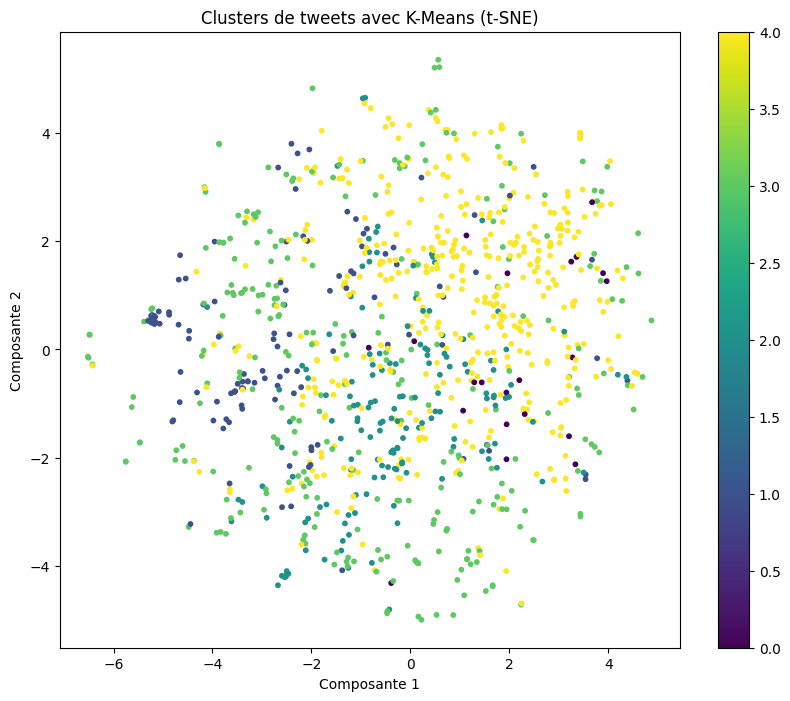

In [41]:
# Visualisation des clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=sample_clusters, cmap='viridis', s=10)
plt.colorbar(scatter)
plt.title("Clusters de tweets avec K-Means (t-SNE)")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


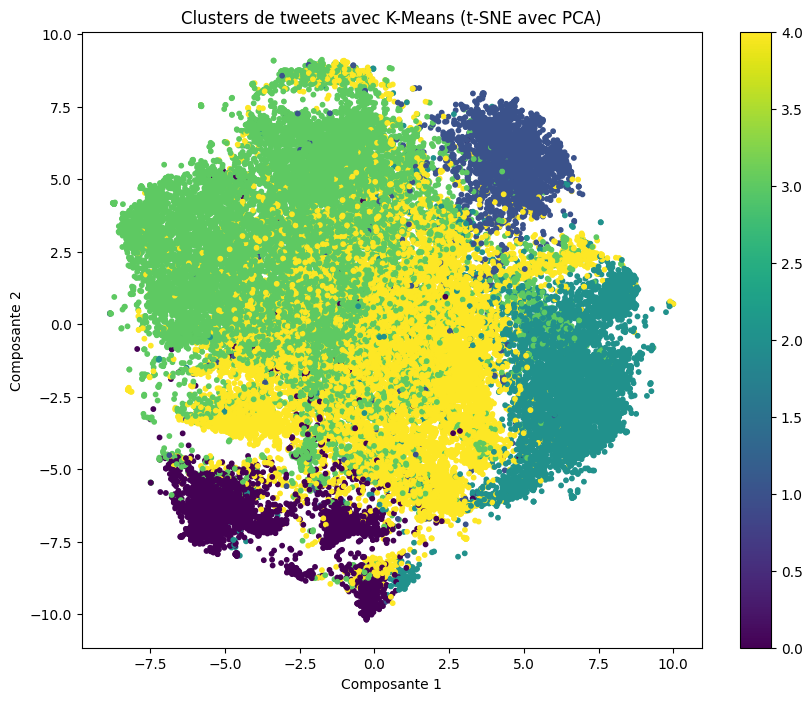

In [42]:
from sklearn.decomposition import PCA

# Réduire les dimensions à 50 avec PCA
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_tfidf)

# Appliquer t-SNE sur les données réduites
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X_pca)

# Visualisation des clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=dataset['kmeans_cluster'], cmap='viridis', s=10)
plt.colorbar(scatter)
plt.title("Clusters de tweets avec K-Means (t-SNE avec PCA)")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.show()


In [43]:
print(X_tfidf.shape)  # Taille de la matrice d'origine
print(X_tsne.shape)    # Taille après t-SNE


(41065, 5000)
(41065, 2)


In [52]:
# Choisir un tweet
tweet_index = 1

# Afficher les degrés d'appartenance
print(f"Degrés d'appartenance pour le Tweet {tweet_index + 1} :")
for i, degree in enumerate(u[:, tweet_index]):
    print(f"Cluster {i}: {degree:.2f}")


Degrés d'appartenance pour le Tweet 2 :
Cluster 0: 0.20
Cluster 1: 0.20
Cluster 2: 0.20
Cluster 3: 0.20
Cluster 4: 0.20


# nombre de tweet  par cluster

In [53]:
from collections import Counter

# Compter les occurrences dans chaque cluster
cluster_counts = Counter(clusters)

# Afficher les résultats
print("Nombre de tweets par cluster principal :")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} tweets")


Nombre de tweets par cluster principal :
Cluster 3: 218 tweets
Cluster 0: 203 tweets
Cluster 1: 228 tweets
Cluster 4: 223 tweets
Cluster 2: 128 tweets


# Lister les tweets par cluster

In [55]:
# Grouper les tweets par cluster
grouped_tweets = {i: [] for i in range(n_clusters)}
for i, cluster in enumerate(clusters):
    grouped_tweets[cluster].append(tweets[i])

# Afficher les tweets par cluster
for cluster, tweets_in_cluster in grouped_tweets.items():
    print(f"\nCluster {cluster}:")
    for tweet in tweets_in_cluster[:4]:  # Afficher les 4 premiers tweets dans chaque cluster
        print(f" - {tweet}")



Cluster 0:
 - Tweet 2
 - Tweet 5
 - Tweet 6
 - Tweet 8

Cluster 1:
 - Tweet 3
 - Tweet 7
 - Tweet 11
 - Tweet 17

Cluster 2:
 - Tweet 14
 - Tweet 42
 - Tweet 45
 - Tweet 55

Cluster 3:
 - Tweet 1
 - Tweet 12
 - Tweet 20
 - Tweet 24

Cluster 4:
 - Tweet 4
 - Tweet 9
 - Tweet 15
 - Tweet 19


In [58]:
pip freeze > requirements.txt